<a href="https://colab.research.google.com/github/lalesafarzade/Recommendation_system_Project/blob/lale/Notebooks/1-Data_extracting_for_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from ast import literal_eval
import requests
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
#from configs import api_key

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving clean_movie.csv to clean_movie.csv


### Extracting data from first Movielens dataset

In [ ]:
movie_ml_25=pd.read_csv('../Resources/ml-25m/movies.csv')
movie_ml_25.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
link_ml_25=pd.read_csv('../Resources/ml-25m/links.csv')
link_ml_25.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [ ]:
link_ml_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


### Merging dataframes

In [ ]:
ml_25_df = pd.merge(link_ml_25, movie_ml_25, on="movieId")
ml_25_df.head(2)

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
ml_25_df.isna().sum()

movieId      0
imdbId       0
tmdbId     107
title        0
genres       0
dtype: int64

In [ ]:
#extract year and title from title column
ml_25_df = ml_25_df.assign(year = lambda x: x['title'].str.extract('(\d+)'))
ml_25_df = ml_25_df.assign(title = lambda x: x['title'].str.split('(').str[0])
ml_25_df.head(2)


,movieId,imdbId,tmdbId,title,genres,year
0,1,114709,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,113497,8844.0,Jumanji,Adventure|Children|Fantasy,1995


In [ ]:
ml_25_df = ml_25_df.assign(genres = lambda x: x['genres'].str.split('|'))

In [ ]:
#checking null values after extracting
ml_25_df.drop(['tmdbId'],axis=1,inplace=True)
ml_25_df.isna().sum()

movieId      0
imdbId       0
title        0
genres       0
year       387
dtype: int64

In [ ]:
len(ml_25_df)

62423

### Extracting data from metadata Movielens json 

In [ ]:
json_metadata=pd.read_json('../Resources/movie_dataset_public_final/raw/metadata_updated.json',orient='str', lines=True)
json_metadata.head(2)

,title,directedBy,starring,avgRating,imdbId,item_id
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146,114709,1
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605,113497,2


In [ ]:
#extract year and title from title column
json_metadata = json_metadata.assign(year = lambda x: x['title'].str.extract('(\d+)'))
json_metadata = json_metadata.assign(title = lambda x: x['title'].str.split('(').str[0])
json_metadata.head(2)

,title,directedBy,starring,avgRating,imdbId,item_id,year
0,Toy Story,John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146,114709,1,1995
1,Jumanji,Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605,113497,2,1995


In [ ]:
#checking null values after extracting
json_metadata.isna().sum()

title           0
directedBy      0
starring        0
avgRating       0
imdbId          0
item_id         0
year          618
dtype: int64

### Merging Movielense dataframes 

In [ ]:
df=json_metadata[['imdbId','directedBy','starring','avgRating']]
mvielense_df = pd.merge(ml_25_df, df, on=["imdbId"],how='inner')
mvielense_df.head(2)

,movieId,imdbId,title,genres,year,directedBy,starring,avgRating
0,1,114709,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146
1,2,113497,Jumanji,"[Adventure, Children, Fantasy]",1995,Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605


In [ ]:
len(mvielense_df)

62417

In [ ]:
#checking null values after extracting
mvielense_df.isna().sum()

movieId         0
imdbId          0
title           0
genres          0
year          386
directedBy      0
starring        0
avgRating       0
dtype: int64

### Using OMDB API for imputing null value of the year

In [ ]:
#miss_year_movie=mvielense_df[mvielense_df['year'].isna()]['title'].to_list()
#url = "http://www.omdbapi.com/?apikey=" + api_key + "&t="
#Title = []
#Year = []
#imdbId=[]

#for i in miss_year_movie:
    #try:
       # response = requests.get(url + i).json()
    
       # Title.append(response['Title'])
       # Year.append(response['Year'])
       # imdbId.append(response['imdbID'])
   # except:
      #  print("title not found")
    

In [ ]:
#OMDB movies data
impute_df=pd.DataFrame({'title':Title,'year':Year})
impute_df.head(2)

,title,year
0,Terrible Joe Moran,1984
1,The Court-Martial of Jackie Robinson,1990


In [ ]:
#The rows with null value in year column
year_miss_df=mvielense_df[mvielense_df['year'].isna()].drop(['year'],axis=1)
year_miss_df.head(2)

,movieId,imdbId,title,genres,directedBy,starring,avgRating
15036,79607,66079,"Millions Game, The","[Action, Drama, Sci-Fi, Thriller]",Tom Toelle,"Jörg Pleva, Dieter Hallervorden, Josef Fröhlic...",3.625
25387,123619,88248,Terrible Joe Moran,[(no genres listed)],,,2.500


In [ ]:
#imputing rows by merging the api data for year column
imputing_df = pd.merge(year_miss_df, impute_df, on=["title"],how='left')
imputing_df = imputing_df.reindex(columns=['movieId', 'imdbId', 'title', 'genres', 'year', 'directedBy',
       'starring', 'avgRating'])
imputing_df.head(2)

,movieId,imdbId,title,genres,year,directedBy,starring,avgRating
0,79607,66079,"Millions Game, The","[Action, Drama, Sci-Fi, Thriller]",NaN,Tom Toelle,"Jörg Pleva, Dieter Hallervorden, Josef Fröhlic...",3.625
1,123619,88248,Terrible Joe Moran,[(no genres listed)],1984,,,2.500


In [ ]:
imputing_df.isna().sum()

movieId         0
imdbId          0
title           0
genres          0
year          105
directedBy      0
starring        0
avgRating       0
dtype: int64

In [ ]:
mvielense_df=mvielense_df.dropna()
imputing_df=imputing_df.dropna()
clean_movie_df = pd.concat([mvielense_df, imputing_df])
clean_movie_df.head(2)

,movieId,imdbId,title,genres,year,directedBy,starring,avgRating
0,1,114709,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146
1,2,113497,Jumanji,"[Adventure, Children, Fantasy]",1995,Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605


In [ ]:
clean_movie_df.isna().sum()

movieId       0
imdbId        0
title         0
genres        0
year          0
directedBy    0
starring      0
avgRating     0
dtype: int64

In [ ]:
len(clean_movie_df)

62312

In [ ]:
clean_movie_df.to_csv('output_files/clean_movie.csv',index=False)

## Merging Dataframes for analysing

In [4]:
movie_df=pd.read_csv('/content/clean_movie.csv')

In [6]:
rating_df=pd.read_csv('/content/ratings.csv')
rating_df.head(2)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817


In [8]:
df = pd.merge(rating_df,movie_df,on='movieId')
df.head()

,userId,movieId,rating,timestamp,imdbId,title,genres,year,directedBy,starring,avgRating
0,1,296,5.0,1147880044,110912,Pulp Fiction,"['Comedy', 'Crime', 'Drama', 'Thriller']",1994,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Tim Roth, Am...",4.1876
1,3,296,5.0,1439474476,110912,Pulp Fiction,"['Comedy', 'Crime', 'Drama', 'Thriller']",1994,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Tim Roth, Am...",4.1876
2,4,296,4.0,1573938898,110912,Pulp Fiction,"['Comedy', 'Crime', 'Drama', 'Thriller']",1994,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Tim Roth, Am...",4.1876
3,5,296,4.0,830786155,110912,Pulp Fiction,"['Comedy', 'Crime', 'Drama', 'Thriller']",1994,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Tim Roth, Am...",4.1876
4,7,296,4.0,835444730,110912,Pulp Fiction,"['Comedy', 'Crime', 'Drama', 'Thriller']",1994,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Tim Roth, Am...",4.1876


In [9]:
df.to_csv('/content/analysis.csv',index=False)

In [10]:
df.to_csv('analysis.csv',index=False)

## EDA

In [29]:
rated_df=df.groupby('title')['rating'].mean().sort_values(ascending=False)

In [30]:
#not rated movies
rated_df.tail(10)

title
The Ranch                    0.5
7 Main Wishes                0.5
Extraction Day               0.5
Shepherd                     0.5
Girl He Left Behind, The     0.5
Jaane Hoga Kya               0.5
Camera Shy                   0.5
The Recce                    0.5
Luz                          0.5
Aloha Summer                 0.5
Name: rating, dtype: float64

#### Most watched rated movies

In [31]:
most_popular_movies=df.groupby('title')['rating'].count().sort_values(ascending=False)
most_popular_movies.head(10)

title
Forrest Gump                           81491
Shawshank Redemption, The              81482
Pulp Fiction                           79672
Silence of the Lambs, The              74127
Matrix, The                            72674
Star Wars: Episode IV - A New Hope     68717
Jurassic Park                          64144
Schindler's List                       60411
Braveheart                             59184
Fight Club                             58773
Name: rating, dtype: int64

In [32]:
least_popular_movies=most_popular_movies.tail(10)
least_popular_movies

title
L'oeuvre au noir                                     1
The Mark of the Renegade                             1
L'uomo della carità                                  1
L'uomo dalla croce                                   1
L'uccello migratore                                  1
The Marriage Chronicles                              1
L'opéra de quat'sous                                 1
L'onorata famiglia                                   1
The Marriage-Go-Round                                1
"BLOW THE NIGHT!" Let's Spend the Night Together     1
Name: rating, dtype: int64

#### Ratings dataframe with average rating and number of ratings:

In [33]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together",3.000000,1
"""Great Performances"" Cats",2.896648,179
#1 Cheerleader Camp,2.111111,9
#Captured,3.750000,2
#Female Pleasure,3.666667,3


In [41]:
movie_df[['avgRating','title']].sort_values(by='avgRating',ascending=False).head()

,avgRating,title
31156,5.0,Suicide Dolls
25968,5.0,The Outlaws Is Coming
27920,5.0,Henry VIII and His Six Wives
51782,5.0,The Californians
51771,5.0,Always Worthy



avgRating column is from IMBD and rating column is the avearage of users rating

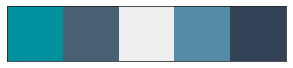

In [65]:
# Set your custom color palette
movies_colors = ["#00909E", "#476072", "#EEEEEE", "#548CA8","#334257"]
sns.set_palette(sns.color_palette(movies_colors))
sns.palplot(movies_colors)

<Figure size 1440x504 with 0 Axes>

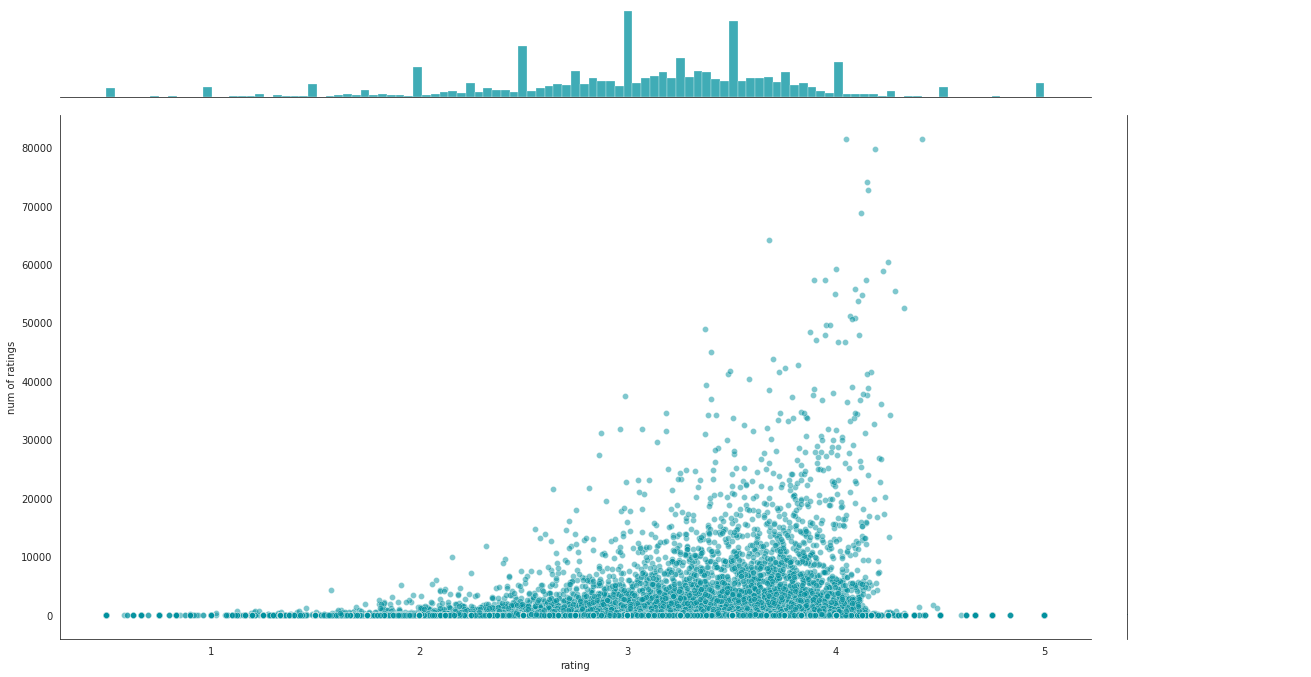

In [46]:
plt.figure(figsize=(20,7))
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)
plt.gcf().set_size_inches(20, 10)

Text(0.5, 1.0, 'Distribution of User rating')

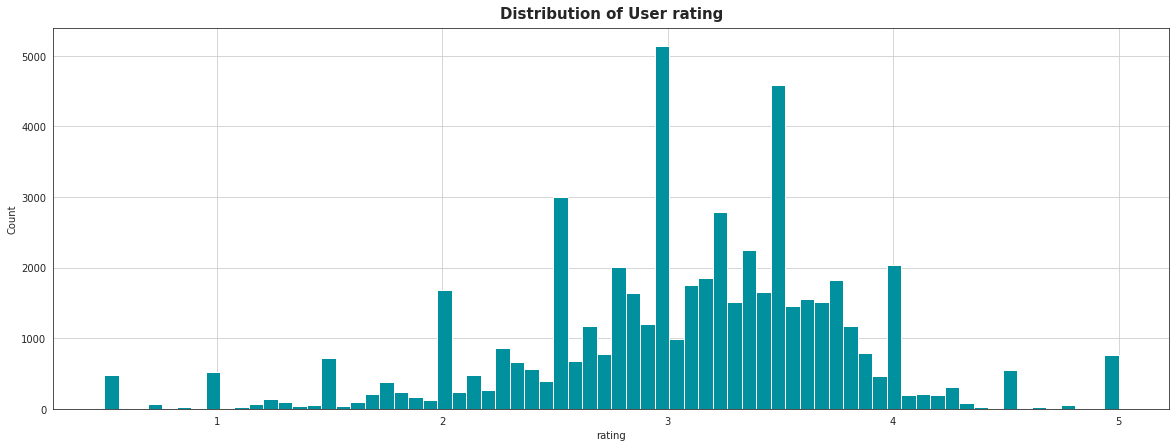

In [47]:
plt.figure(figsize=(20,7))
ratings['rating'].hist(bins=70)
plt.ylabel("Count")
plt.xlabel("rating")
plt.title('Distribution of User rating',fontsize= 15,pad=10,fontweight="bold")

Text(0.5, 1.0, 'Distribution of num of ratings')

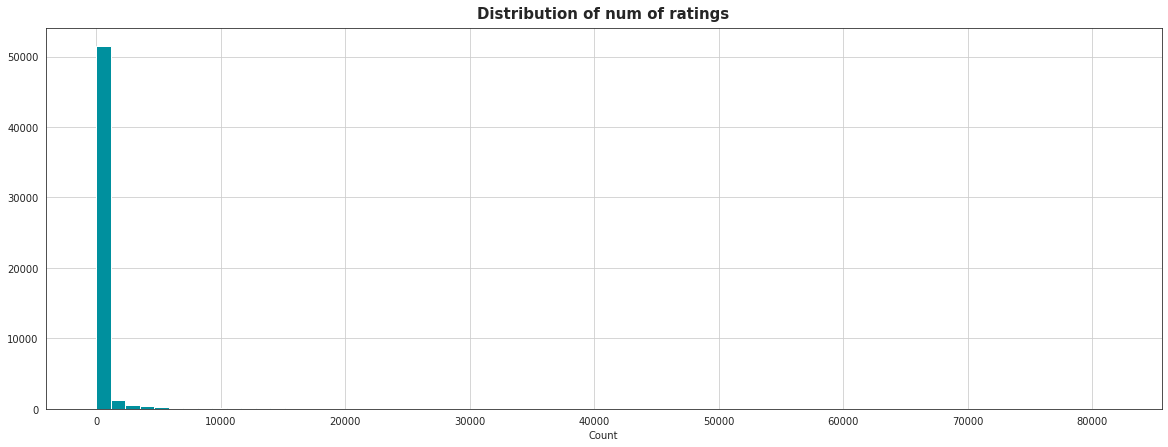

In [49]:
plt.figure(figsize=(20,7))
ratings['num of ratings'].hist(bins=70)
plt.xlabel("Count")
plt.title('Distribution of num of ratings',fontsize= 15,pad=10,fontweight="bold")

Text(0.5, 1.0, 'Distribution of IMBD avg rating versus user rating avg')

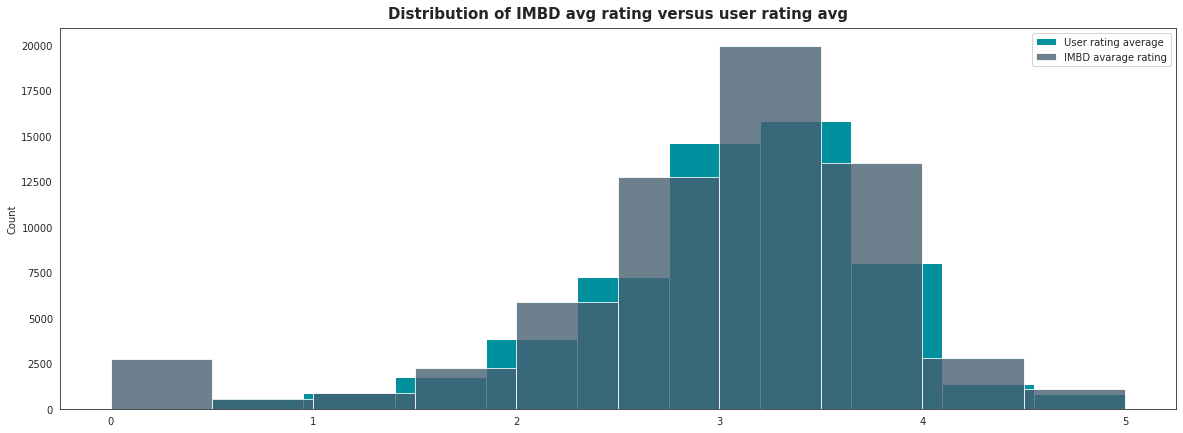

In [67]:
plt.figure(figsize=(20,7))
ratings['rating'].plot(kind='hist',label='User rating average')
movie_df['avgRating'].plot(kind='hist',label='IMBD avarage rating',alpha=.8)
plt.legend()
plt.ylabel("Count")
plt.title('Distribution of IMBD avg rating versus user rating avg',fontsize= 15,pad=10,fontweight="bold")

Text(0.5, 1.0, 'Top 10 Movie Directors with the most movies directing')

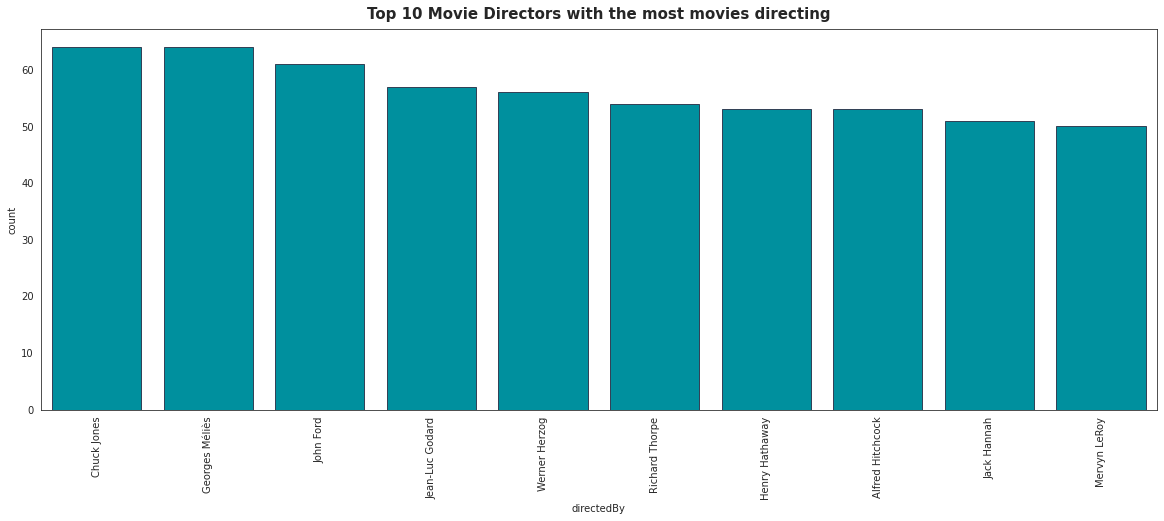

In [115]:
movie_director=movie_df['directedBy'].value_counts().head(11).to_dict()
director_ls=[i for i in movie_director]
movie_dir_df=pd.concat([movie_df[movie_df['directedBy']==i] for i in director_ls[1:]])
plt.figure(figsize=(20,7))
sns.countplot(x='directedBy',data=movie_dir_df,facecolor='#00909E',edgecolor='#334257')
plt.xticks(rotation="vertical")
plt.title('Top 10 Movie Directors with the most movies directing',fontsize= 15,pad=10,fontweight="bold")

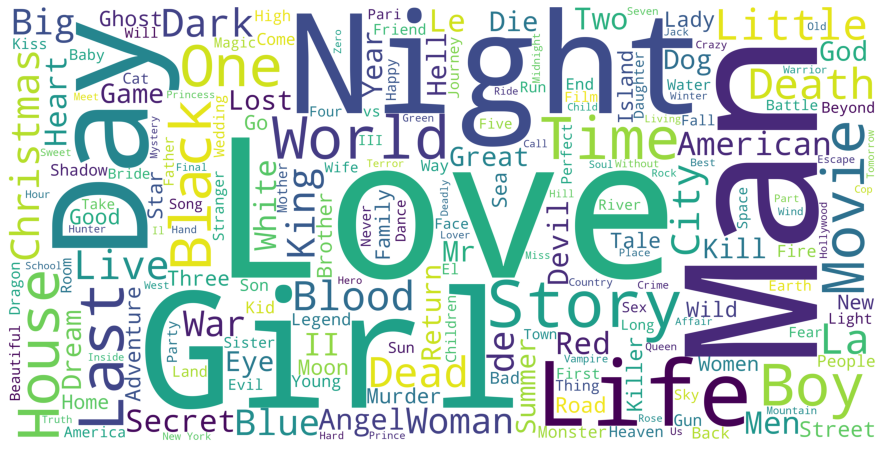

In [80]:
from wordcloud import WordCloud, STOPWORDS
movie_df['title'] = movie_df['title'].astype('str')
title_corpus = ' '.join(movie_df['title'])
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

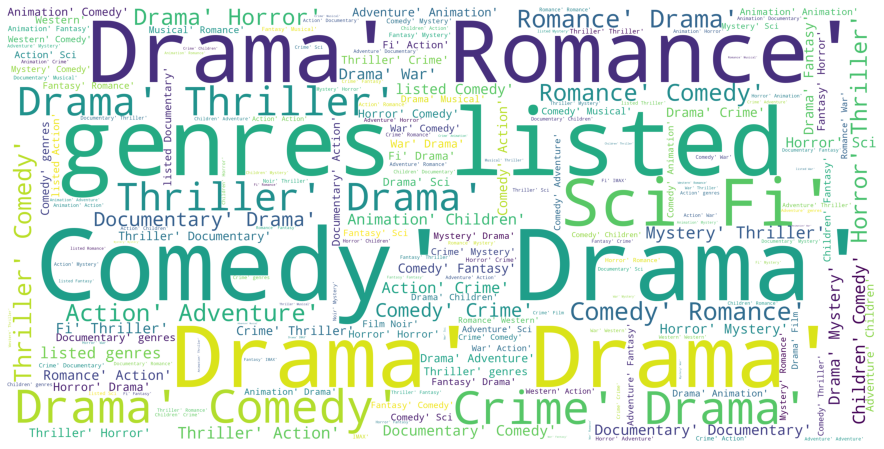

In [83]:
movie_df['genres'] = movie_df['genres'].astype('str')
genres_corpus = ' '.join(movie_df['genres'])
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(genres_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Number of movies between 1995_2019')

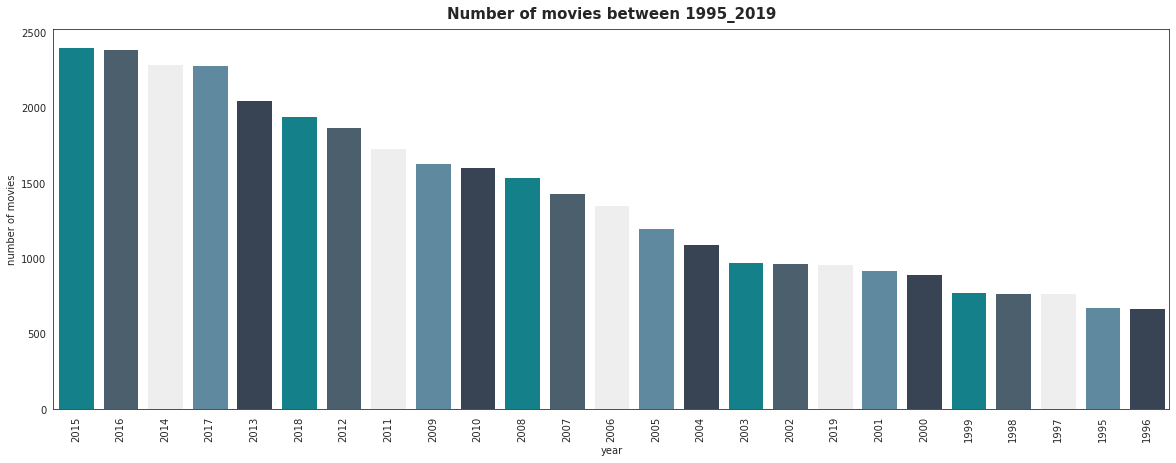

In [100]:
year_df=movie_df['year'].value_counts().head(25).to_frame().reset_index()
year_df.columns=['year','number of movies']
plt.figure(figsize=(20,7))
sns.barplot(x='year',y='number of movies',data=year_df,palette=movies_colors)
plt.xticks(rotation="vertical")
plt.title('Number of movies between 1995_2019',fontsize= 15,pad=10,fontweight="bold")

In [109]:
ratings.sort_values(by='num of ratings',ascending=False).head(11)

,rating,num of ratings
title,,
Forrest Gump,4.048011,81491
"Shawshank Redemption, The",4.413576,81482
Pulp Fiction,4.188912,79672
"Silence of the Lambs, The",4.151342,74127
"Matrix, The",4.154099,72674
Star Wars: Episode IV - A New Hope,4.120189,68717
Jurassic Park,3.679175,64144
Schindler's List,4.247579,60411
Braveheart,4.002273,59184


Text(0.5, 1.0, 'Most popular movies')

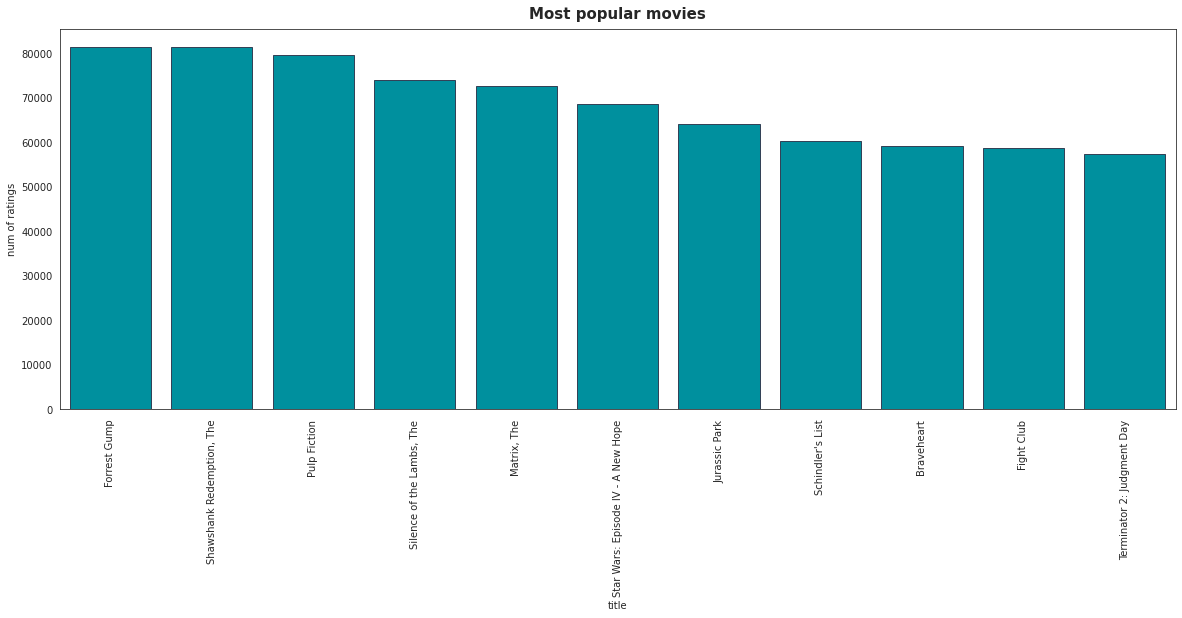

In [116]:
most_popular=ratings.sort_values(by='num of ratings',ascending=False).head(11).reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x='title',y='num of ratings',data=most_popular,facecolor='#00909E',edgecolor='#334257')
plt.xticks(rotation="vertical")
plt.title('Most popular movies',fontsize= 15,pad=10,fontweight="bold")